**QUESTION:**

Carbon-dioxide (CO2) is one of the major greenhouse gases that is implicated in the gradual warming of the earth’s temperature. Measured concentrations of CO2 (in ppm) and atmospheric temperature (spatially and temporally averaged over a year) available from USEPA’s Climate Change Indicators website (www.epa.gov/climate-indicators) between 1984 and 2014 is given in co2_levels.csv The temperatures are deviation in deg F from the average temperature in the period 1901-2000. Climate models recommend that the global temperature increase should be kept below 2 deg C (3.6 deg F) by cutting down on CO2 emissions. Using ordinary linear least squares regression, estimate the maximum permissible level of CO2 in the atmosphere that can meet this goal. Assume that the level of CO2 increases linearly with time, estimate using the given data how many years it will take for CO2 to reach the maximum permissible. Note that this is a simplified analysis because other greenhouse gases such as methane, nitrous oxide, water vapour, etc. have not been considered. In order to improve your model you are encouraged to use other reliable data sources you can find (cite the sources from where you obtain additional data).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-levels/co2_levels.xlsx


In [2]:
# Reading the file "co2_levels"
df=pd.read_excel("/kaggle/input/co2-levels/co2_levels.xlsx")

In [3]:
import matplotlib .pyplot as plt
import pandas as pd
import statsmodels .api as sm
from statsmodels .formula.api import ols

In [5]:
# print the first five rows of the dataframe using the belolw function
df.head()
# print the information about the dataset using the below function
df.info()
# change the column names of the dataframe
df.set_axis(["year","co2","temp"],axis="columns",inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    31 non-null     float64
 1   co2     31 non-null     float64
 2   temp    31 non-null     float64
dtypes: float64(3)
memory usage: 872.0 bytes


Text(0.5, 0, 'temp in 0F')

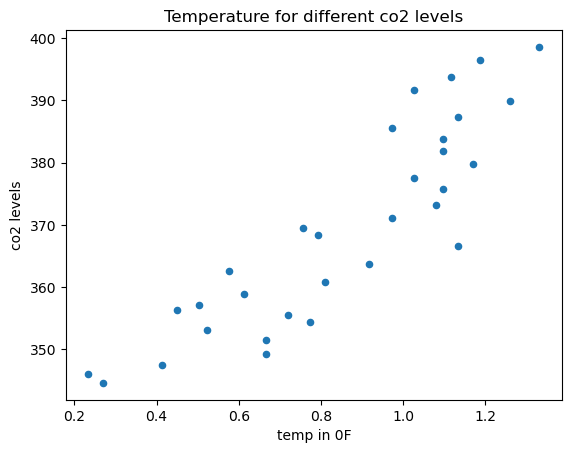

In [6]:
import matplotlib.pyplot as plt
# plot the scatterplot for the given data
df.plot("temp","co2",kind="scatter")
plt.title("Temperature for different co2 levels")
plt.ylabel("co2 levels")
plt.xlabel("temp in 0F")

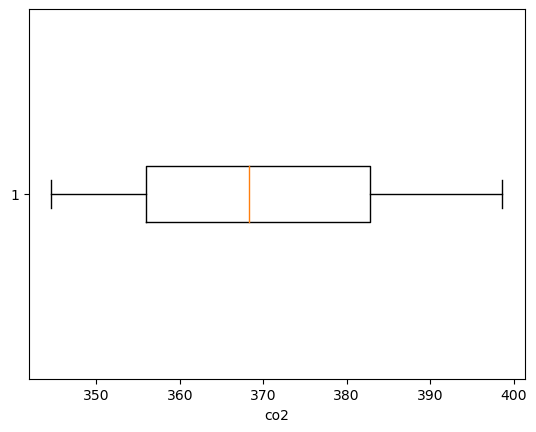

In [7]:
# Obtain the box plots for columns to find any outliers
plt.boxplot(df['co2'] ,vert=False)
plt.xlabel('co2')
plt.show ()

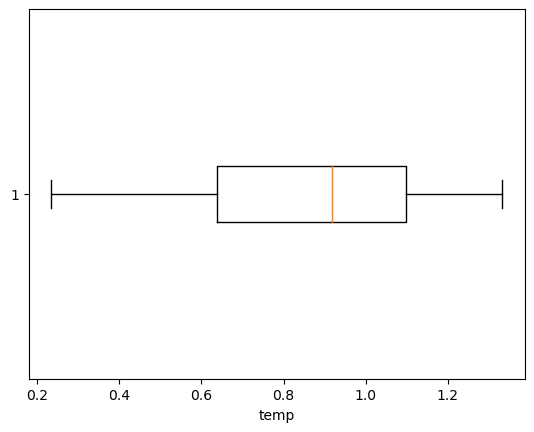

In [57]:
plt.boxplot(df['temp'] ,vert=False)
plt.xlabel('temp')
plt.show ()

In statsmodels, ordinary least-squares linear models are specified via the function ols (short for ordinary least-squares).To remove the intercept term, add -1 to the ols formula, as in ols(’y∼x-1’).

In [8]:
# analyzing linear models using Python and the data science module statsmodels
myData = pd. DataFrame (df)
mod = ols("co2~temp", data=myData)
mod_matrix = pd. DataFrame (mod.exog ,columns=mod. exog_names )
# print the matrix containing the intercept and data values
print( mod_matrix )

    Intercept   temp
0         1.0  0.270
1         1.0  0.234
2         1.0  0.414
3         1.0  0.666
4         1.0  0.666
5         1.0  0.522
6         1.0  0.774
7         1.0  0.720
8         1.0  0.450
9         1.0  0.504
10        1.0  0.612
11        1.0  0.810
12        1.0  0.576
13        1.0  0.918
14        1.0  1.134
15        1.0  0.792
16        1.0  0.756
17        1.0  0.972
18        1.0  1.080
19        1.0  1.098
20        1.0  1.026
21        1.0  1.170
22        1.0  1.098
23        1.0  1.098
24        1.0  0.972
25        1.0  1.134
26        1.0  1.260
27        1.0  1.026
28        1.0  1.116
29        1.0  1.188
30        1.0  1.332


In [9]:
# creating a new dataframe for including the number of years starting from 1984
df2=pd.DataFrame({})
df2["time"]=np.arange(1,32,1)
df2["co2"]=myData["co2"]

In [60]:
myData.head()

,year,co2,temp
0,1984.0,344.58,0.270
1,1985.0,346.04,0.234
2,1986.0,347.39,0.414
3,1987.0,349.16,0.666
4,1988.0,351.56,0.666


In [11]:
model = ols("co2~temp", data=myData)
fit = model.fit () #fit the model defined above
b0 , b1= fit.params
print(fit.params)

Intercept    328.629718
temp          47.919083
dtype: float64


The above output gives the least-squares estimates of β0 and β1.

Text(0.5, 0, 'temp in 0F')

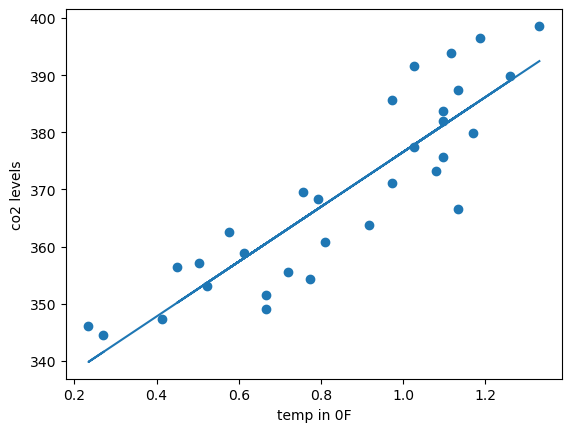

In [12]:
# scatter plot including the Regression line as well
plt.plot(myData.temp , b0 + b1*myData.temp)
plt.scatter(myData.temp , myData.co2)
plt.ylabel("co2 levels")
plt.xlabel("temp in 0F")

In [13]:
# Although ols performs a complete analysis of the linear model, not all its calculations
# need to be presented. A summary of the results can be obtained with the method summary.

print(fit.summary ())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.32e-11
Time:                        16:15:46   Log-Likelihood:                -106.06
No. Observations:                  31   AIC:                             216.1
Df Residuals:                      29   BIC:                             219.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    328.6297      4.190     78.426      0.0

The main output items are the following:

• **coef**: Estimates of the parameters of the regression line.

• **std error**: Standard deviations of the estimators of the regression line. These are the square roots of the variances of the {bβi} obtained.

• **t**: Realization of test statistics associated with the hypotheses H0 : βi = 0 and H1 : βi , 0, i = 0, 1. In particular, the outcome of T. 

• **P>|t|** : P-value of test (two-sided test).

• **[0.025 0.975]:** 95% confidence intervals for the parameters.

• **R-Squared**: Coefficient of determination R2 (percentage of variation explained by the regression)

• **Adj. R-Squared**: adjusted R2

• **F-statistic**: Realization of the F test statistic associated with testing the full model against the default model. The associated degrees of freedom (Df Model and Df Residuals) are given, as is the P-value: Prob (F-statistic).

• **AIC**: The AIC number is, minus two times the log-likelihood plus two times the number of model parameters.

Text(0.5, 0, 'co2')

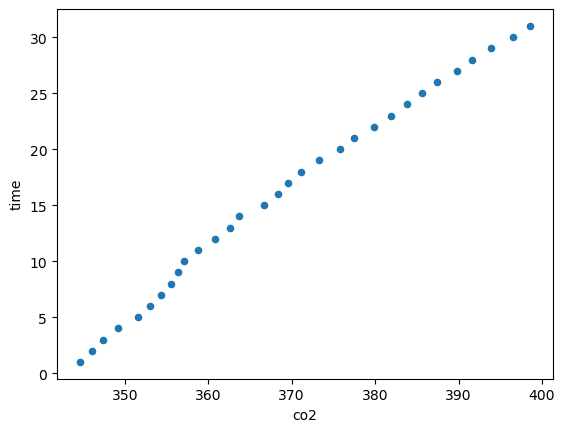

In [14]:
df2.plot("co2","time",kind="scatter")
plt.ylabel("time")
plt.xlabel("co2")

In [15]:
# creating another model for fitting a regression line between co2 levels and the no.of years
mod2 = ols("time~co2", data=df2)
mod_matrix2 = pd. DataFrame (mod2.exog ,columns=mod2. exog_names )
print( mod_matrix2 )

    Intercept     co2
0         1.0  344.58
1         1.0  346.04
2         1.0  347.39
3         1.0  349.16
4         1.0  351.56
5         1.0  353.07
6         1.0  354.35
7         1.0  355.57
8         1.0  356.38
9         1.0  357.07
10        1.0  358.82
11        1.0  360.80
12        1.0  362.59
13        1.0  363.71
14        1.0  366.65
15        1.0  368.33
16        1.0  369.52
17        1.0  371.13
18        1.0  373.22
19        1.0  375.77
20        1.0  377.49
21        1.0  379.80
22        1.0  381.90
23        1.0  383.76
24        1.0  385.59
25        1.0  387.37
26        1.0  389.85
27        1.0  391.63
28        1.0  393.82
29        1.0  396.48
30        1.0  398.61


In [73]:
model2 = ols("time~co2", data=df2)
fit2 = model2.fit () #fit the model defined above
b00 , b11= fit2.params
print(fit2.params)

Intercept   -189.891868
co2            0.557339
dtype: float64


Text(0.5, 0, 'co2')

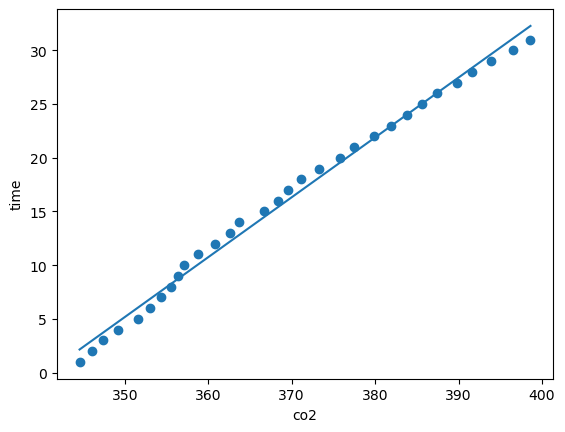

In [75]:
plt.plot(df2.co2 , b00 + b11*df2.co2)
plt.scatter(df2.co2 , df2.time)
plt.ylabel("time")
plt.xlabel("co2")

In [76]:
print(fit2.summary ())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4113.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           8.40e-33
Time:                        14:33:26   Log-Likelihood:                -35.005
No. Observations:                  31   AIC:                             74.01
Df Residuals:                      29   BIC:                             76.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -189.8919      3.214    -59.090      0.0

From the above summary, it is clearly shown that the co2 levels are increasing with time.

In [82]:
max_co2=b0 + b1*3.6
print(max_co2)

501.1384156126437


the maximum permissible level of CO2 in the atmosphere should be kept below 501.13 ppm such that the global temperature increase should be kept below 2 deg C (3.6 deg F).This can be estimated by the model1

In [83]:
print(b00 + b11*max_co2)

89.41194513321057


It will take nearly 90-31=59 years for CO2 to reach the maximum permissible level. this can be estimated by the model 2.